## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""

import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
"""
Your code here
"""
## 資料前處理 one hot
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""Code Here
建立你的神經網路
"""

def build_mlp(input_shape=5, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [7]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [8]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 182us/step - loss: 1.9389 - accuracy: 0.3048 - val_loss: 1.7837 - val_accuracy: 0.3542
Epoch 2/100
50000/50000 [==============================] - 9s 182us/step - loss: 1.7173 - accuracy: 0.3825 - val_loss: 1.6879 - val_accuracy: 0.3940
Epoch 3/100
50000/50000 [==============================] - 9s 177us/step - loss: 1.6288 - accuracy: 0.4173 - val_loss: 1.6516 - val_accuracy: 0.3989
Epoch 4/100
50000/50000 [==============================] - 9s 178us/step - loss: 1.5596 - accuracy: 0.4437 - val_loss: 1.5184 - val_accuracy: 0.4623
Epoch 5/100
50000/50000 [==============================] - 9s 179us/step - loss: 1.5079 - accuracy: 0.4645 - val_loss: 1.5328 - val_accuracy: 0.4549
Epoch 6/100
50000/50000 [==============================] - 9s 177us/step - loss: 1.4729 - accuracy: 0.4754 - val_loss: 1.5378 - val_accuracy: 0.4487
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 9s 175us/step - loss: 0.6069 - accuracy: 0.7841 - val_loss: 1.8657 - val_accuracy: 0.5158
Epoch 56/100
50000/50000 [==============================] - 9s 176us/step - loss: 0.6128 - accuracy: 0.7802 - val_loss: 1.9638 - val_accuracy: 0.4999
Epoch 57/100
50000/50000 [==============================] - 9s 175us/step - loss: 0.5941 - accuracy: 0.7878 - val_loss: 1.9138 - val_accuracy: 0.5168
Epoch 58/100
50000/50000 [==============================] - 9s 175us/step - loss: 0.5728 - accuracy: 0.7963 - val_loss: 1.9633 - val_accuracy: 0.5137
Epoch 59/100
50000/50000 [==============================] - 9s 175us/step - loss: 0.5650 - accuracy: 0.7981 - val_loss: 1.9931 - val_accuracy: 0.5021
Epoch 60/100
50000/50000 [==============================] - 9s 175us/step - loss: 0.5493 - accuracy: 0.8028 - val_loss: 1.9816 - val_accuracy: 0.5097
Epoch 61/100
50000/50000 [==============================] - 9s 176us/step - loss: 0.5526 - accuracy: 0.8025 - val

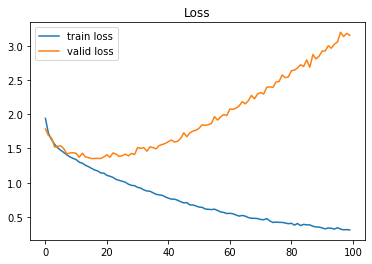

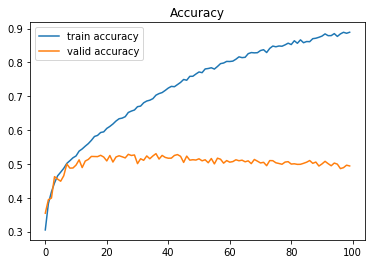

In [10]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()